<a href="https://colab.research.google.com/github/JI411/Decoder_hack_EVRAZ/blob/develop_colab/scr/data_view.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Самые-популярные-марки-стали-в-наборе-данных" data-toc-modified-id="Самые-популярные-марки-стали-в-наборе-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Самые популярные марки стали в наборе данных</a></span></li><li><span><a href="#Пропуски-нолевые-значения" data-toc-modified-id="Пропуски-нолевые-значения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Пропуски нолевые значения</a></span></li><li><span><a href="#Дисперсия" data-toc-modified-id="Дисперсия-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Дисперсия</a></span></li><li><span><a href="#Выбор-необходимых-данных-для-предсказания" data-toc-modified-id="Выбор-необходимых-данных-для-предсказания-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выбор необходимых данных для предсказания</a></span></li><li><span><a href="#Выбросы-в-данных" data-toc-modified-id="Выбросы-в-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Выбросы в данных</a></span></li></ul></li><li><span><a href="#Predict" data-toc-modified-id="Predict-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Predict</a></span></li><li><span><a href="#Проверка-предсказания-на-случайных-данных" data-toc-modified-id="Проверка-предсказания-на-случайных-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка предсказания на случайных данных</a></span></li></ul></div>

In [1]:
!pip install pandas_profiling==2.7.1 
!git clone https://github.com/JI411/Decoder_hack_EVRAZ/

fatal: destination path 'Decoder_hack_EVRAZ' already exists and is not an empty directory.


In [2]:
import pandas as pd
import numpy as np
import random
import re

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# Полезные ссылки

[Detailed exploratory data analysis with python](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python)

[Tuatini GODARD](https://www.kaggle.com/ekami66)

[Пример для деревьев решений](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py)



In [3]:
df_in = pd.read_csv('/content/Decoder_hack_EVRAZ/data/input/Исходные данные.csv', 
            encoding = 'utf-8', 
            index_col = 0,
            sep = ';')
df = df_in
df_in.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,"29,0","45,3666667","24,4","41,0333333",NaN,"0,45646","0,059572","0,117446","0,104762","0,0409383","1557,0","1580,0","13,6067425",NaN,"12809,0163934","115,5","1,0","1,0","1,0","18,611",NaN,NaN,NaN,NaN,"0,17",NaN,"0,401","0,123","0,02",NaN,NaN,NaN,"0,051939","0,112",NaN,"0,182",NaN,"0,106","5209,0","0,002","0,389","0,368","0,127","0,682","0,01","0,011","0,086","0,009","0,023","0,459","0,002","0,002","0,003","0,756","0,0001","0,417","0,126","0,779","0,009","0,012","0,086","0,011","0,018","0,559","0,003","0,037",NaN,"63,7","1,1","3,7","0,12","2,6",NaN,NaN,"53,4","1,0","5,8","0,15","2,6",NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,"26,0","44,0666667","13,8666667","44,0666667",NaN,"0,359285","0,083738","0,160923","0,110327","0,0400831","1601,0","1591,0","8,074721",NaN,"12816,3461538","111,6","1,0","1,0","1,0","11,659",NaN,NaN,NaN,NaN,"0,488",NaN,NaN,"0,094","0,02",NaN,NaN,NaN,"0,050854","0,102",NaN,"0,251",NaN,"0,149","2962,0","0,002","0,465","0,345","0,112","0,643","0,009","0,011","0,08","0,007","0,023","0,461","0,002","0,002","0,003","0,774","0,0003","0,416","0,109","0,767","0,008","0,013","0,079","0,008","0,021","0,543","0,003","0,038",NaN,"58,5","0,8","4,9","0,14","2,2",NaN,NaN,"59,3","0,6","4,1","0,11","2,3",NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,"24,0","43,35","17,95","43,35",NaN,"0,331665","0,08149","0,132332","0,13986","0,0416225","1593,0","1586,0","13,801968",NaN,"12511,4206128","115,8","1,0","1,0","1,0","19,871",NaN,NaN,NaN,NaN,"0,05",NaN,"0,346","0,061","0,02",NaN,NaN,NaN,"0,052807","0,16",NaN,"0,204",NaN,"0,145","3743,0","0,002","0,513","0,351","0,107","0,674","0,007","0,011","0,078","0,008","0,019","0,455","0,002","0,002","0,004","0,77","0,0009","0,417","0,108","0,788","0,006","0,012","0,078","0,008","0,013","0,568","0,003","0,038",NaN,"58,0","0,8","8,6","0,12","2,6",NaN,NaN,"57,2","0,5","8,1","0,13","2,3",NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,"17,0","46,1833333","19,8166667","46,1833333",NaN,"0,377945","0,133194","0,221605","0,165186","0,0420497","1589,0","1589,0","12,6649585",NaN,"12998,1497056","116,3","1,0","1,0","1,0","19,497",NaN,NaN,"0,077",NaN,"0,05",NaN,"0,39","0,059","0,02",NaN,NaN,NaN,"0,053349","0,161",NaN,"0,345",NaN,"0,237","4293,0","0,002","0,487","0,31","0,105","0,611","0,009","0,011","0,07","0,006","0,02","0,434","0,001","0,001","0,003","0,767","0,0002","0,419","0,103","0,795","0,008","0,013","0,07","0,007","0,014","0,571",

# Задача

EDA
выводы по качеству данных:
1. Пропуски
2. Нули
3. Дисперсия
4. Выбросы

Создать модель предсказания для столбцов:

* химшлак последний Al2O3
* химшлак последний CaO
* химшлак последний R
* химшлак последний SiO2

## EDA

### Самые популярные марки стали в наборе данных


In [4]:
mat_counts = df_in.МАРКА.value_counts()
print(f"Самая популярная марка стали: {mat_counts.index[0]}")
labels = mat_counts.index
values = mat_counts.values
pull = np.zeros(shape=(values.shape[0]))
pull[values.argmax()] = 0.1
fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=values,
                             pull=pull,
                             title='Популятность марок стали', )])

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    )

fig.update_traces(hoverinfo='label+percent+value', textinfo='none',
                  marker=dict(line=dict(color='#000000', width=2)))

fig.show()

Самая популярная марка стали: Э76ХФ


In [5]:
profile = pandas_profiling.ProfileReport(df_in, title='Pandas Profiling Report')
# profile.to_notebook_iframe()
profile.to_file("/content/profile.html")

Summarize dataset:   0%|          | 0/96 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pandas_profiling/model/correlations.py:107: UserWarning:

There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Пропуски, нулевые значения

In [6]:
df_him = df_in[[column for column in df_in.columns if re.search('последний|первый', 
                                                                  column.lower())]]
df_skips = pd.DataFrame({'Counnt' : df_him.count().sort_index()})
df_skips['Counnt_nan'] = df_him.shape[0] - df_skips.Counnt
df_skips['per_nan'] = df_skips['Counnt_nan'] / (df_skips['Counnt_nan'] + df_skips['Counnt'])

fig = px.bar(df_skips, x=df_skips.index, y='per_nan')
fig.show()

### Дисперсия

In [7]:
# Строковые данные
str_dada_col = ['nplv', 'DT', 'МАРКА', 'ПРОФИЛЬ']
columns = df_in.columns.values
columns_float = columns[np.isin(columns, str_dada_col, invert=True)]

In [8]:
# Замена , на . в данных которые необходмо привести к flot
# Приведение данных к float16
# Замена nan на 0
df_disp = df_in
df_disp[columns_float] =  df_disp[columns_float] \
                      .replace(',', '.', regex=True) \
                      .astype('float16')
df[columns_float] = df_disp[columns_float]
df.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.37500,24.406250,41.03125,NaN,0.456543,0.059570,0.117432,0.104736,0.040924,1557.0,1580.0,13.609375,NaN,12808.0,115.5000,1.0,1.0,1.0,18.609375,NaN,NaN,NaN,NaN,0.170044,NaN,0.400879,0.122986,0.020004,NaN,NaN,NaN,0.051941,0.112000,NaN,0.182007,NaN,0.106018,5208.0,0.002001,0.388916,0.367920,0.126953,0.682129,0.010002,0.011002,0.085999,0.009003,0.022995,0.458984,0.002001,0.002001,0.003000,0.755859,0.0001,0.416992,0.125977,0.778809,0.009003,0.012001,0.085999,0.011002,0.018005,0.559082,0.003,0.036987,NaN,63.68750,1.099609,3.699219,0.119995,2.599609,NaN,NaN,53.40625,1.000000,5.800781,0.150024,2.599609,NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.06250,13.867188,44.06250,NaN,0.359375,0.083740,0.160889,0.110352,0.040070,1601.0,1591.0,8.078125,NaN,12816.0,111.6250,1.0,1.0,1.0,11.656250,NaN,NaN,NaN,NaN,0.488037,NaN,NaN,0.093994,0.020004,NaN,NaN,NaN,0.050842,0.101990,NaN,0.250977,NaN,0.149048,2962.0,0.002001,0.465088,0.344971,0.112000,0.643066,0.009003,0.011002,0.080017,0.007000,0.022995,0.460938,0.002001,0.002001,0.003000,0.773926,0.0003,0.416016,0.109009,0.767090,0.008003,0.013000,0.078979,0.008003,0.020996,0.542969,0.003,0.037994,NaN,58.50000,0.799805,4.898438,0.140015,2.199219,NaN,NaN,59.31250,0.600098,4.101562,0.109985,2.300781,NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.34375,17.953125,43.34375,NaN,0.331543,0.081482,0.132324,0.139893,0.041626,1593.0,1586.0,13.804688,NaN,12512.0,115.8125,1.0,1.0,1.0,19.875000,NaN,NaN,NaN,NaN,0.049988,NaN,0.345947,0.061005,0.020004,NaN,NaN,NaN,0.052795,0.160034,NaN,0.203979,NaN,0.145020,3744.0,0.002001,0.513184,0.351074,0.106995,0.673828,0.007000,0.011002,0.078003,0.008003,0.018997,0.455078,0.002001,0.002001,0.004002,0.770020,0.0009,0.416992,0.107971,0.788086,0.006001,0.012001,0.078003,0.008003,0.013000,0.567871,0.003,0.037994,NaN,58.00000,0.799805,8.601562,0.119995,2.599609,NaN,NaN,57.18750,0.500000,8.101562,0.130005,2.300781,NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.18750,19.812500,46.18750,NaN,0.377930,0.133179,0.221558,0.165161,0.042053,1589.0,1589.0,12.664062,NaN,13000.0,116.3125,1.0,1.0,1.0,19.500000,NaN,NaN,0.077026,NaN,0.049988,NaN,0.389893,0.058990,0.020004,NaN,NaN,NaN,0.053345,0.161011,NaN,0.344971,NaN,0.237061,4292.0,0.002001,0.487061,0.310059,0.104980,0.610840,0.009003,0.011002,0.070007,0.006001,0.020004,0.434082,0.001000,0.001000,0.003000,0.767090,0.0002,0.418945,0.103027,0.794922,0.008003,

In [9]:
df_disp[columns_float].describe().transpose().sort_values('50%')

,count,mean,std,min,25%,50%,75%,max
химсталь последний Ca,6218.0,0.000319,0.000244,0.000000,0.000200,0.000300,0.000400,0.007000
химсталь первый Al_1,6444.0,0.001783,0.000488,0.001000,0.002001,0.002001,0.002001,0.006001
химсталь первый Ti_1,6444.0,0.001662,0.000546,0.000000,0.001000,0.002001,0.002001,0.007000
химсталь последний Al,6444.0,0.003181,0.001315,0.001000,0.003000,0.003000,0.003000,0.048004
химсталь первый V_1,6444.0,0.002771,0.002794,0.000000,0.002001,0.003000,0.003000,0.083008
химсталь последний Ti,6444.0,0.002903,0.000546,0.001000,0.003000,0.003000,0.003000,0.005001
химсталь последний Mo,6444.0,0.006256,0.002316,0.001000,0.005001,0.006001,0.007000,0.061005
химсталь первый Mo_1,6443.0,0.007053,0.002115,0.002001,0.006001,0.007000,0.008003,0.064026
химсталь первый P_1,6444.0,0.009109,0.002043,0.004002,0.008003,0.009003,0.010002,0.020996
химсталь первый N_1,6443.0,0.009972,0.001505,0.003000,0.009003,0.010002,0.011002,0.028000


In [10]:
# df_disp[columns_float].describe().transpose().sort_values('50%')[['mean',
#                                                                   'std',
#                                                                   'min',
#                                                                   '25%',
#                                                                   '50%',
#                                                                   '75%',
#                                                                   'max']].plot.barh(figsize=(6, 50))

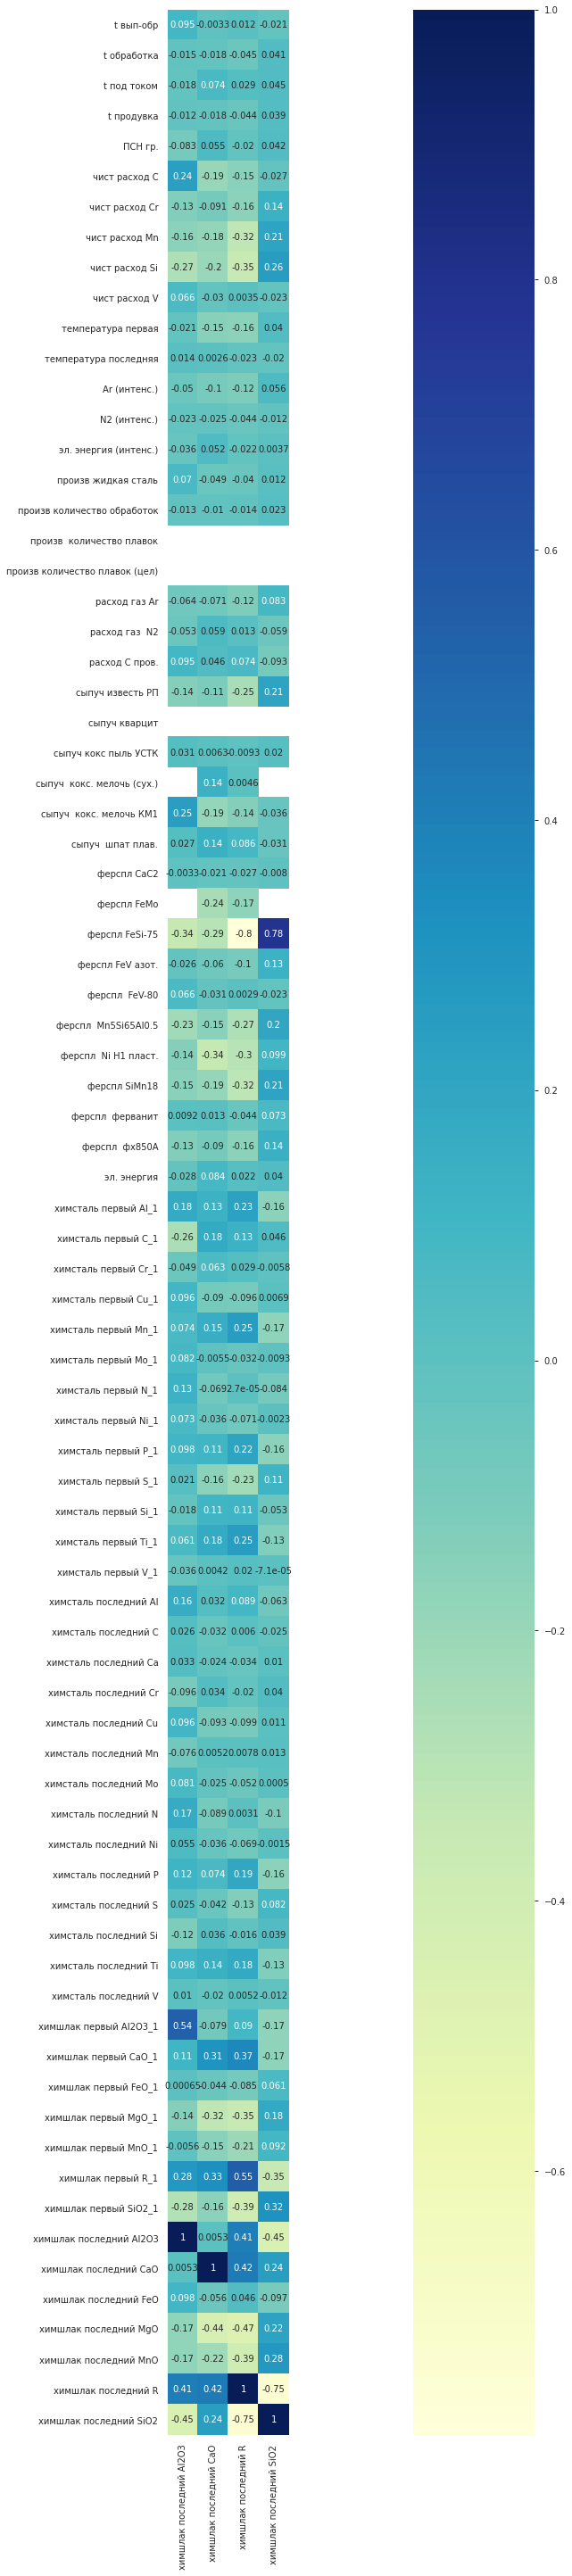

In [11]:
#Простое изучение зависимости целевых данных отностельно остальных
corrmat = df_disp[columns_float].corr()
f, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(corrmat[['химшлак последний Al2O3', 
          'химшлак последний CaO',
          'химшлак последний R',
          'химшлак последний SiO2']], 
            annot=True,
            square=True,
            cmap= 'YlGnBu')

Из этого представления видно: что наиболее полезные для предсказания данные:

    ("чист расход", "ферспл")

### Выбор необходимых данных для предсказания

In [12]:
# drop null
# Фильтруем данные в которых встречаются пропуски в одном из целевых столбцов
X_columns = [column for column in df.columns if re.search('чист расход|ферспл|сыпуч кокс|сыпуч шпат', 
                                                                  column.lower())]
print(X_columns)
y_columns = ['химшлак последний Al2O3', 
             'химшлак последний CaO',
             'химшлак последний R',
             'химшлак последний SiO2']

['чист расход C', 'чист расход Cr', 'чист расход Mn', 'чист расход Si', 'чист расход V', 'сыпуч кокс пыль УСТК', 'ферспл CaC2', 'ферспл FeMo', 'ферспл FeSi-75', 'ферспл FeV азот.', 'ферспл  FeV-80', 'ферспл  Mn5Si65Al0.5', 'ферспл  Ni H1 пласт.', 'ферспл SiMn18', 'ферспл  ферванит', 'ферспл  фх850А']


### Выбросы в данных


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Обзор выбросов в колонок:
['чист расход C', 'чист расход Cr', 'чист расход Mn', 'чист расход Si', 'чист расход V', 'сыпуч кокс пыль УСТК', 'ферспл CaC2', 'ферспл FeMo', 'ферспл FeSi-75', 'ферспл FeV азот.', 'ферспл  FeV-80', 'ферспл  Mn5Si65Al0.5', 'ферспл  Ni H1 пласт.', 'ферспл SiMn18', 'ферспл  ферванит', 'ферспл  фх850А']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Данные по колонке: чист расход C
Заполненны на 91.39%


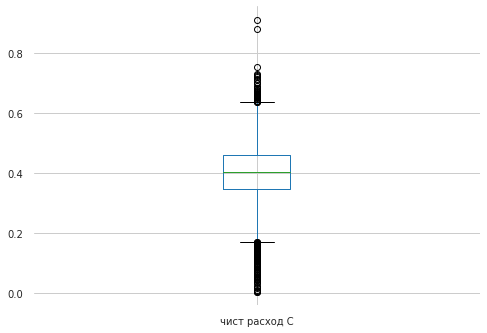

Данные по колонке: чист расход Cr
Заполненны на 83.55%


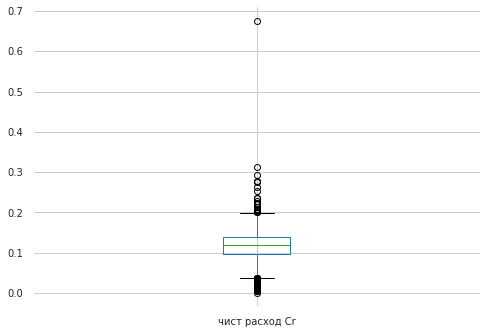

Данные по колонке: чист расход Mn
Заполненны на 91.34%


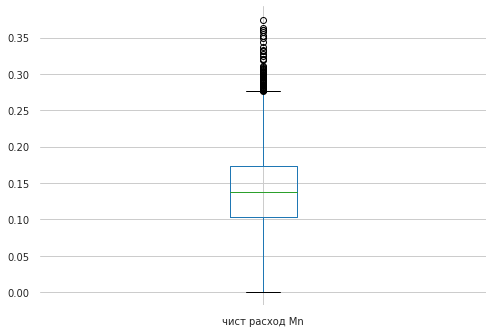

Данные по колонке: чист расход Si
Заполненны на 91.34%


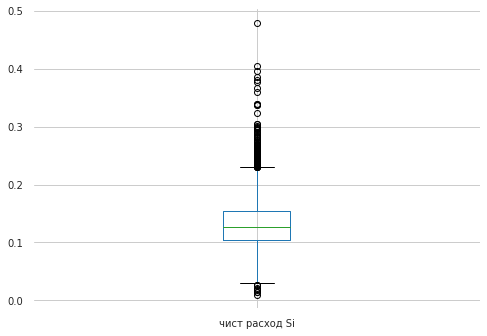

Данные по колонке: чист расход V
Заполненны на 87.74%


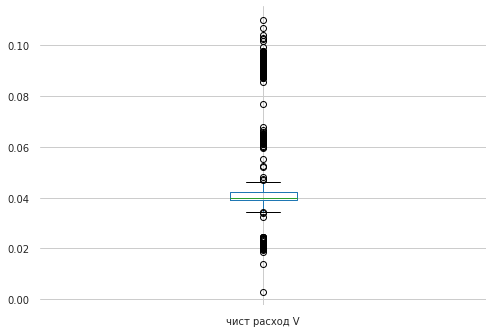

Данные по колонке: сыпуч кокс пыль УСТК
Заполненны на 91.21%


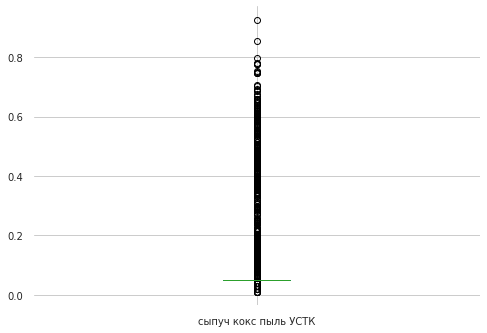

Данные по колонке: ферспл CaC2
Заполненны на 88.68%


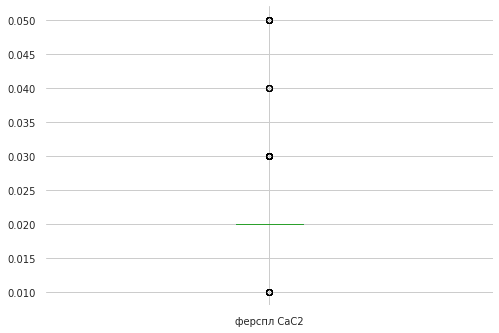

Данные по колонке: ферспл FeMo
Заполненны на 0.47%


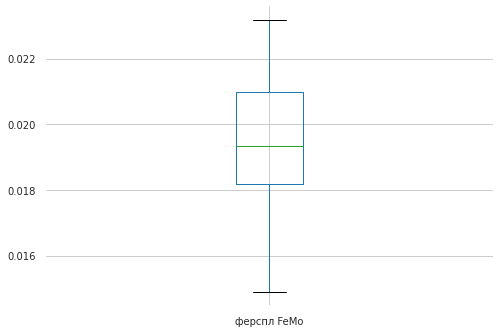

Данные по колонке: ферспл FeSi-75
Заполненны на 0.07%


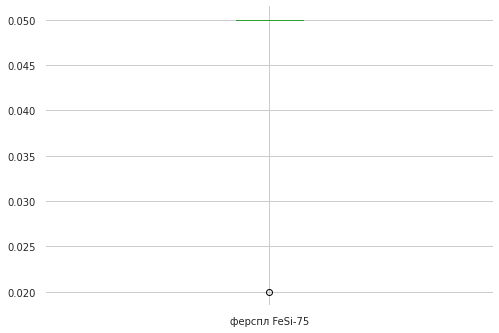

Данные по колонке: ферспл FeV азот.
Заполненны на 5.44%


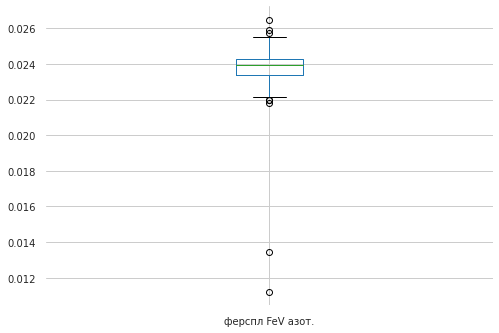

Данные по колонке: ферспл  FeV-80
Заполненны на 87.76%


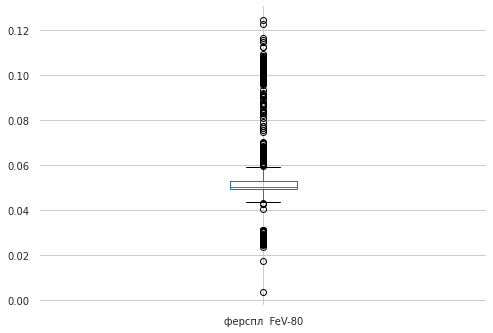

Данные по колонке: ферспл  Mn5Si65Al0.5
Заполненны на 90.9%


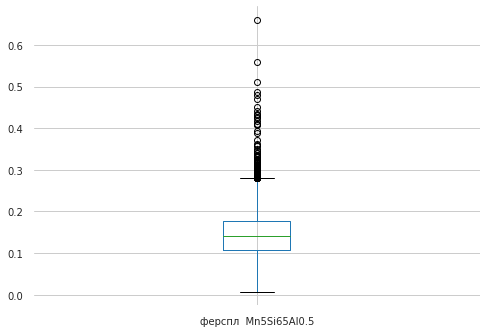

Данные по колонке: ферспл  Ni H1 пласт.
Заполненны на 1.16%


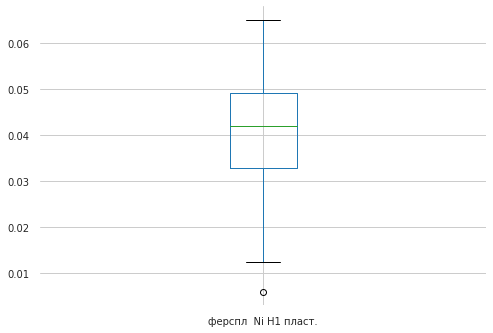

Данные по колонке: ферспл SiMn18
Заполненны на 90.87%


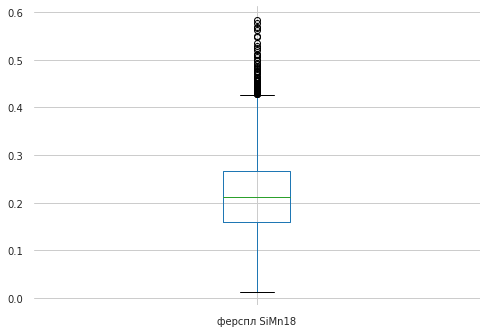

Данные по колонке: ферспл  ферванит
Заполненны на 14.44%


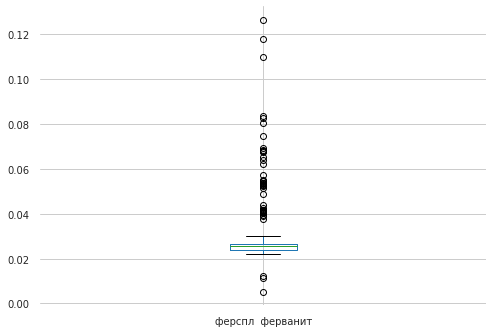

Данные по колонке: ферспл  фх850А
Заполненны на 83.55%


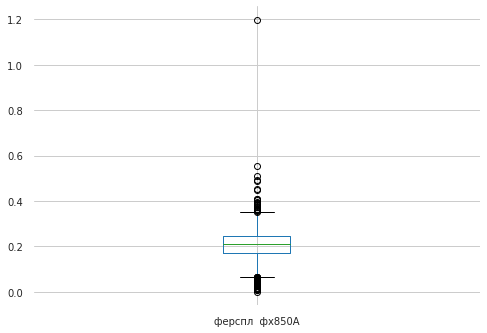


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Обзор выбросов в колонок:
['химшлак последний Al2O3', 'химшлак последний CaO', 'химшлак последний R', 'химшлак последний SiO2']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Данные по колонке: химшлак последний Al2O3
Заполненны на 67.35%


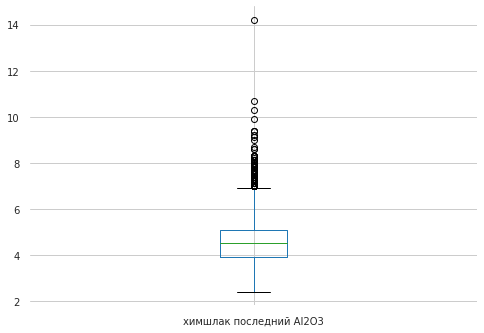

Данные по колонке: химшлак последний CaO
Заполненны на 91.52%


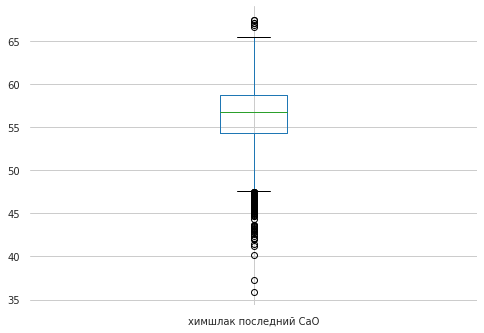

Данные по колонке: химшлак последний R
Заполненны на 91.52%


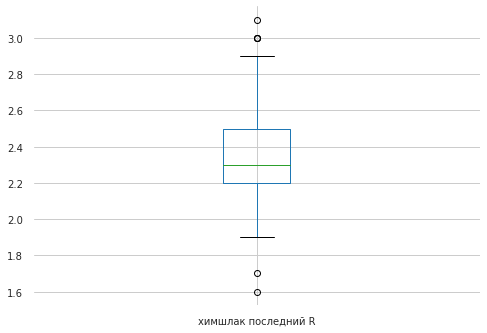

Данные по колонке: химшлак последний SiO2
Заполненны на 67.35%


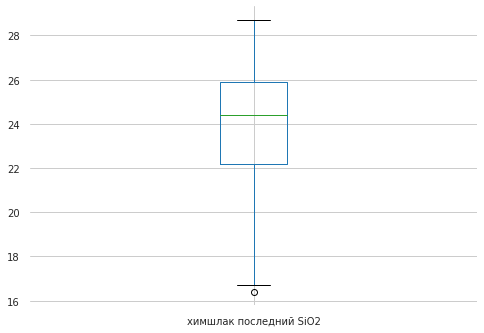

In [13]:
for col_list in X_columns, y_columns:
    print(f"\n{'+'*100}\nОбзор выбросов в колонок:\n{col_list}\n{'+'*100}\n")
    for column in col_list:
        plt.figure()
        is_nan = df_disp[column].isna().value_counts()
        plt_zap = round(is_nan[False] / df_disp.shape[0]*100, 2)
        print(f"Данные по колонке: {column}\nЗаполненны на {plt_zap}%")
        df_disp[column].plot.box(grid = True)
        plt.show()

## Predict

In [14]:
def data_pipline(df):
    df = df[df.МАРКА == 'Э76ХФ'].fillna(0)

    df['nplv'] = df['nplv'].apply(lambda x: ''.join([c for c in x.replace('?', '0') if c.isdigit()])).astype('int64')
    dum = pd.get_dummies(df['ПРОФИЛЬ'], dummy_na=True)
    dum_col = list(dum.columns)
    df = pd.concat([df, dum], axis=1, join="inner")
    df.drop(labels=['DT', 'МАРКА', 'ПРОФИЛЬ'], axis=1, inplace=True)

    columns_float = [col for col in df.columns if df[col].dtype == 'O']
    df_disp = df
    df_disp[columns_float] =  df_disp[columns_float] \
                          .replace(',', '.', regex=True) \
                          .astype('float16')
    df[columns_float] = df_disp[columns_float]
    return df

y_columns = ['химшлак последний Al2O3', 'химшлак последний CaO', 'химшлак последний R', 'химшлак последний SiO2']

In [15]:
df = pd.read_csv('/content/Decoder_hack_EVRAZ/data/input/Исходные данные.csv', 
            encoding = 'utf-8', 
            index_col = 0,
            sep = ';')
df = data_pipline(df)
df.head()

,nplv,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2,Р65,Шар заг d шара 100 мм 2 гр.,NaN
0,683703870,29.0,45.37500,24.406250,41.03125,0.0,0.456543,0.059570,0.117432,0.104736,0.040924,1557.0,1580.0,13.609375,0,12808.0,115.5000,1.0,1.0,1.0,18.609375,0,0.0,0.000000,0.0,0.170044,0.0,0.400879,0.122986,0.020004,0,0,0,0.051941,0.112000,0,0.182007,0,0.106018,5208.0,0.002001,0.388916,0.367920,0.126953,0.682129,0.010002,0.011002,0.085999,0.009003,0.022995,0.458984,0.002001,0.002001,0.003000,0.755859,0.0001,0.416992,0.125977,0.778809,0.009003,0.012001,0.085999,0.011002,0.018005,0.559082,0.003,0.036987,0.0,63.68750,1.099609,3.699219,0.119995,2.599609,0.0,0.0,53.40625,1.000000,5.800781,0.150024,2.599609,0.0,1,0,0
1,683863886,26.0,44.06250,13.867188,44.06250,0.0,0.359375,0.083740,0.160889,0.110352,0.040070,1601.0,1591.0,8.078125,0,12816.0,111.6250,1.0,1.0,1.0,11.656250,0,0.0,0.000000,0.0,0.488037,0.0,0.000000,0.093994,0.020004,0,0,0,0.050842,0.101990,0,0.250977,0,0.149048,2962.0,0.002001,0.465088,0.344971,0.112000,0.643066,0.009003,0.011002,0.080017,0.007000,0.022995,0.460938,0.002001,0.002001,0.003000,0.773926,0.0003,0.416016,0.109009,0.767090,0.008003,0.013000,0.078979,0.008003,0.020996,0.542969,0.003,0.037994,0.0,58.50000,0.799805,4.898438,0.140015,2.199219,0.0,0.0,59.31250,0.600098,4.101562,0.109985,2.300781,0.0,1,0,0
2,683863887,24.0,43.34375,17.953125,43.34375,0.0,0.331543,0.081482,0.132324,0.139893,0.041626,1593.0,1586.0,13.804688,0,12512.0,115.8125,1.0,1.0,1.0,19.875000,0,0.0,0.000000,0.0,0.049988,0.0,0.345947,0.061005,0.020004,0,0,0,0.052795,0.160034,0,0.203979,0,0.145020,3744.0,0.002001,0.513184,0.351074,0.106995,0.673828,0.007000,0.011002,0.078003,0.008003,0.018997,0.455078,0.002001,0.002001,0.004002,0.770020,0.0009,0.416992,0.107971,0.788086,0.006001,0.012001,0.078003,0.008003,0.013000,0.567871,0.003,0.037994,0.0,58.00000,0.799805,8.601562,0.119995,2.599609,0.0,0.0,57.18750,0.500000,8.101562,0.130005,2.300781,0.0,1,0,0
3,683863888,17.0,46.18750,19.812500,46.18750,0.0,0.377930,0.133179,0.221558,0.165161,0.042053,1589.0,1589.0,12.664062,0,13000.0,116.3125,1.0,1.0,1.0,19.500000,0,0.0,0.077026,0.0,0.049988,0.0,0.389893,0.058990,0.020004,0,0,0,0.053345,0.161011,0,0.344971,0,0.237061,4292.0,0.002001,0.487061,0.310059,0.104980,0.610840,0.009003,0.011002,0.070007,0.006001,0.020004,0.434082,0.001000,0.001000,0.003000,0.767090,0.0002,0.418945,0.103027,0.794922,0.008003,0.013000,0.070007,0.007000,0.014000,0.570801,0.003,0.037994,0.0,59.81250,0.399902,6.398438,0.109985,2.400391,0.0,0.0,60.31250,0

In [16]:
X = df.drop(y_columns, axis=1)
y = df[y_columns]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=13)

In [72]:
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor

In [76]:
scaler = MinMaxScaler()
names = X_train.columns
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train = pd.DataFrame(scaled_X_train, columns=names)

normalized_X_train = pd.DataFrame(normalize(X_train, axis=0), columns=names)

In [44]:
# Проврерка Explained_variance_score
def evs(reg):
  pred = reg.predict(np.array(X_test))
  print(f"Explained_variance_score: {round(explained_variance_score(y_test, pred) * 100, 2)}%")

In [68]:
# Линейная регрессия
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
evs(reg)

reg = MultiOutputRegressor(LinearRegression())
cross_val_score(reg, X_train, y_train, cv = 5, scoring='neg_mean_squared_error').mean()

Explained_variance_score: 96.47%


-3.1519000319954706

In [78]:
reg = MultiOutputRegressor(LinearRegression())
cross_val_score(reg, normalized_X_train, y_train, cv = 5, scoring='neg_mean_squared_error').mean()

-3.1518508859127943

In [81]:
reg = MultiOutputRegressor(LinearRegression(normalize=True))
cross_val_score(reg, X_train, y_train, cv = 5, scoring='neg_mean_squared_error').mean()

-3.1517595020344027

In [69]:
reg = LinearRegression().fit(scaled_X_train, y_train)
pred = reg.predict(np.array(scaler.transform(X_test)))
print(f"Explained_variance_score: {round(explained_variance_score(y_test, pred) * 100, 2)}%")
cross_val_score(reg, X_train, y_train, cv = 5, scoring='neg_mean_squared_error').mean()

Explained_variance_score: 96.47%


-3.151900031997023

explained_variance_score: *68.64%*

In [ ]:
# Ridge
from sklearn.linear_model import Ridge

reg = MultiOutputRegressor(Ridge(random_state=411))
cross_val_score(reg, X_train, y_train, cv = 5, scoring='neg_mean_squared_error').mean()
# cross_val_score(reg, scaled_X_train, y_train, cv = 5, scoring='neg_mean_squared_error').mean()

Explained_variance_score: 52.75%

In [58]:
import xgboost as xgb

xgbr = MultiOutputRegressor(xgb.XGBRegressor(verbosity=0)).fit(X_train, y_train)
cross_val_score(xgbr, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean()

-3.363169813156128

## Подбор параметров

-3.1517595020344027